# Make_driving_profile

This notebook creates a driving profile for a person driving a long distance to work and other places. The profile is loosely based on a friend living near Stade in the southwest of Hamburg and working at Otto in the north east. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import refuel_tools as rt

In [2]:
schedule_labels = ['start_date', 'start_lat', 'start_long', 'end_lat', 'end_long', 'distance', 'duration']

home_lat = 53.599389
home_long = 9.424762
work_lat = 53.600410
work_long = 10.070227
sport_lat = 53.461226
sport_long = 9.969592
shop_lat = 53.457027
shop_long = 9.986611
ma_lat = 53.554011
ma_long = 9.920374

home_work_dist = 61.3
home_work_dur = 78
home_sport_dist = 48
home_sport_dur = 60
home_shop_dist = 50
home_shop_dur = 63
home_ma_dist = 49.2
home_ma_dur = 56

schedule = [
    [pd.to_datetime('2019-12-07 12:00', utc=True), home_lat, home_long, shop_lat, shop_long, home_shop_dist, home_shop_dur],
    [pd.to_datetime('2019-12-07 14:00', utc=True), shop_lat, shop_long, home_lat, home_long, home_shop_dist, home_shop_dur],
    [pd.to_datetime('2019-12-07 18:00', utc=True), home_lat, home_long, ma_lat, ma_long, home_ma_dist, home_ma_dur],
    [pd.to_datetime('2019-12-07 21:00', utc=True), ma_lat, ma_long, home_lat, home_long, home_ma_dist, home_ma_dur],
    
    [pd.to_datetime('2019-12-09 07:00', utc=True), home_lat, home_long, work_lat, work_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-09 17:00', utc=True), work_lat, work_long, home_lat, home_long, home_work_dist, home_work_dur],
    
    [pd.to_datetime('2019-12-10 07:00', utc=True), home_lat, home_long, work_lat, work_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-10 17:00', utc=True), work_lat, work_long, home_lat, home_long, home_work_dist, home_work_dur],
    
    [pd.to_datetime('2019-12-11 07:00', utc=True), home_lat, home_long, work_lat, work_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-11 17:00', utc=True), work_lat, work_long, home_lat, home_long, home_work_dist, home_work_dur],
    
    [pd.to_datetime('2019-12-12 07:00', utc=True), home_lat, home_long, work_lat, work_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-12 17:00', utc=True), work_lat, work_long, home_lat, home_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-12 18:00', utc=True), home_lat, home_long, sport_lat, sport_long, home_sport_dist, home_sport_dur],
    [pd.to_datetime('2019-12-12 20:00', utc=True), sport_lat, sport_long, home_lat, home_long, home_sport_dist, home_sport_dur],
    
    [pd.to_datetime('2019-12-13 07:00', utc=True), home_lat, home_long, work_lat, work_long, home_work_dist, home_work_dur],
    [pd.to_datetime('2019-12-13 17:00', utc=True), work_lat, work_long, home_lat, home_long, home_work_dist, home_work_dur],
    
    ]
df = pd.DataFrame(schedule, columns=schedule_labels)

In [3]:
car_consumption = 15.4
car_fuel_vol = 85

In [4]:
# Expand the created dataframe over x weeks
weeks = 3
weeks_to_expand = len(df) * weeks
days = 0
i = 0
leng_df = len(df)

while days < (weeks_to_expand):
    row = df.iloc[i,:] 
    row.start_date += pd.Timedelta(days=7)
    df = df.append(row, ignore_index=True)
    days += 1
    i += 1
    
    if i == leng_df-1:
        i == 0

In [5]:
df['fuel_vol_start'] = car_fuel_vol
df['fuel_vol_end']  = 0
df['refueling_counter'] = 0
df['refueling_date'] = 0 
df['refueling_pos_lat'] = 0
df['refueling_pos_long'] = 0
df['refueling_vol'] = 0
df['refueling_uuid'] = 0

df['trip_con'] = (df.distance * car_consumption) / 100

In [6]:
home_lat = 53.599389
home_long = 9.424762
work_lat = 53.600410
work_long = 10.070227
sport_lat = 53.461226
sport_long = 9.969592
shop_lat = 53.457027
shop_long = 9.986611
ma_lat = 53.554011
ma_long = 9.920374
positions = [(home_lat, home_long), (work_lat, work_long), (sport_lat, sport_long), (shop_lat, shop_long),(ma_lat, ma_long)]

In [7]:
# load timeseries
df_ts = rt.load_data_from_csv(timespan=70)
# get uuids
df_stations = pd.read_csv('./tankerkoenig-data/stations/2019/11/2019-11-08-stations.csv')
df_uuid = rt.get_uuids_around_positions(df_stations, positions, k=1)
df_uuid

,city,uuid,latitude,longitude,brand,distance,origin_lat,origin_long
2614,STADE,51d4b582-a095-1aa0-e100-80009459e03a,53.593800,9.422890,JET,0.655402,53.599389,9.424762
5353,Hamburg,30a50253-2339-469d-a77c-86713d9f5f7f,53.597206,10.064701,ARAL,0.710261,53.600410,10.070227
9676,HAMBURG,51d4b496-a095-1aa0-e100-80009459e03a,53.468600,9.967350,JET,0.857012,53.461226,9.969592
9312,HAMBURG,51d4b654-a095-1aa0-e100-80009459e03a,53.462700,9.984380,JET,0.677836,53.457027,9.986611
1041,Hamburg,d0235369-10e6-4862-8b27-66c03ddace6b,53.564240,9.923700,Mr. Wash Autoservice AG,1.196029,53.554011,9.920374


In [8]:
for ind in range(len(df)):
    if ind != 0:
        df.loc[ind,'fuel_vol_start'] = df.loc[ind-1, 'fuel_vol_end']
        df.loc[ind,'refueling_counter'] = df.loc[ind-1, 'refueling_counter']
    df.loc[ind,'fuel_vol_end'] = df.loc[ind, 'fuel_vol_start'] - df.loc[ind, 'trip_con']
    # REFUELING EVENT
    # Refueling happens always at the START of a journey !!!!
    if df.loc[ind,'fuel_vol_start'] < 10:
        df.loc[ind,'refueling_counter'] += 1
        df.loc[ind, 'refueling_date'] = df.loc[ind, 'start_date'] + pd.Timedelta(minutes=10)
        df.loc[ind, 'refueling_pos_lat'] = df.loc[ind, 'start_lat']
        df.loc[ind, 'refueling_pos_long'] = df.loc[ind, 'start_long']
        df.loc[ind, 'refueling_vol'] = car_fuel_vol - df.loc[ind,'fuel_vol_start']
        df.loc[ind, 'fuel_vol_start'] = car_fuel_vol
        df.loc[ind,'fuel_vol_end'] = car_fuel_vol - df.loc[ind, 'trip_con']
        df.loc[ind, 'refueling_uuid'] = df_uuid[df_uuid.origin_lat == df.loc[ind, 'start_lat']].uuid.values
        

In [10]:
for index, row in df.iterrows():
    if row.refueling_uuid != 0:
        df.loc[index, 'refueling_price'] = rt.get_true_price(df_ts, row.refueling_uuid, row.start_date)
        df.loc[index, 'refueling_cost'] = df.loc[index, 'refueling_vol'] * df.loc[index, 'refueling_price']

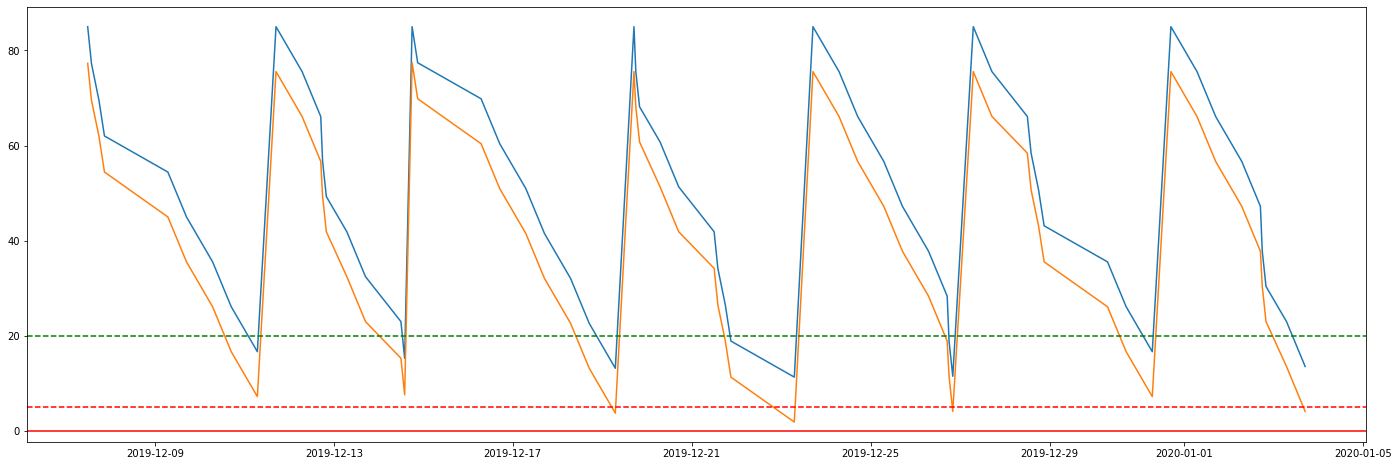

In [11]:
fig = plt.figure(figsize=(24,8))
plt.plot(df.start_date, df.fuel_vol_start)
plt.plot(df.start_date, df.fuel_vol_end)

plt.axhline(y=5, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=20, color='g', linestyle='--')


In [13]:
df.to_pickle('./data/driving_profile.pkl')

In [14]:
print('total refueling cost: {}'.format(df.refueling_cost.sum()))
print('total fuel consumed: {}'.format(df.refueling_vol.sum()))
print('mean fuel price: {}'.format(df.refueling_price.mean()))

total refueling cost: 664.838867
total fuel consumed: 478.09299999999996
mean fuel price: 1.3906666666666665
